<h1 style="text-align:center; font-size:24px;">Name:Rohan Nachane</h1>

<h2 style="text-align:center; font-size:25px; color:blue;"><b>Practical 05-K Nearest Neighbour</b></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.drop(['Pregnancies','BloodPressure','SkinThickness'],axis=1,inplace=True)

In [5]:
df

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,0,33.6,0.627,50,1
1,85,0,26.6,0.351,31,0
2,183,0,23.3,0.672,32,1
3,89,94,28.1,0.167,21,0
4,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...
763,101,180,32.9,0.171,63,0
764,122,0,36.8,0.340,27,0
765,121,112,26.2,0.245,30,0
766,126,0,30.1,0.349,47,1


In [6]:
columns_to_replace = df.columns[df.columns != 'Outcome']
df[columns_to_replace] = df[columns_to_replace].replace(0, df[columns_to_replace].mean())

In [7]:
df[columns_to_replace]

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,79.799479,33.6,0.627,50
1,85.0,79.799479,26.6,0.351,31
2,183.0,79.799479,23.3,0.672,32
3,89.0,94.000000,28.1,0.167,21
4,137.0,168.000000,43.1,2.288,33
...,...,...,...,...,...
763,101.0,180.000000,32.9,0.171,63
764,122.0,79.799479,36.8,0.340,27
765,121.0,112.000000,26.2,0.245,30
766,126.0,79.799479,30.1,0.349,47


In [8]:
x = df.drop('Outcome', axis=1)  
y = df['Outcome']


In [9]:
x

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,79.799479,33.6,0.627,50
1,85.0,79.799479,26.6,0.351,31
2,183.0,79.799479,23.3,0.672,32
3,89.0,94.000000,28.1,0.167,21
4,137.0,168.000000,43.1,2.288,33
...,...,...,...,...,...
763,101.0,180.000000,32.9,0.171,63
764,122.0,79.799479,36.8,0.340,27
765,121.0,112.000000,26.2,0.245,30
766,126.0,79.799479,30.1,0.349,47


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [13]:
X_scaled

array([[ 0.86527574, -0.41776815,  0.16725546,  0.46849198,  1.4259954 ],
       [-1.20598931, -0.41776815, -0.85153454, -0.36506078, -0.19067191],
       [ 2.01597855, -0.41776815, -1.33182125,  0.60439732, -0.10558415],
       ...,
       [-0.02240928, -0.07159946, -0.90975111, -0.68519336, -0.27575966],
       [ 0.14197684, -0.41776815, -0.34213954, -0.37110101,  1.17073215],
       [-0.94297153, -0.41776815, -0.29847711, -0.47378505, -0.87137393]])

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
#x_train

In [17]:
#x_test

In [18]:
#y_train

In [19]:
#y_test

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=30)

In [54]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [55]:
y_pred = knn.predict(x_test)

In [56]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

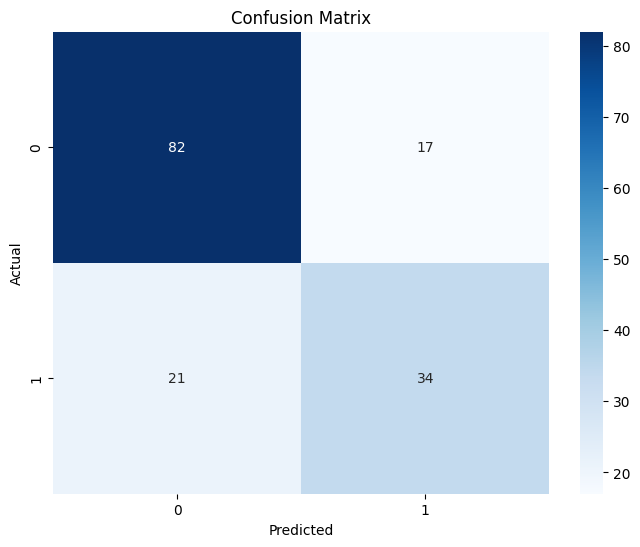

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [61]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622642


<h2 style="text-align:center; font-size:25px; color:blue;"><b>K-Fold</b></h2>

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
knn = KNeighborsClassifier(n_neighbors=5)

In [134]:
cv_scores = cross_val_score(knn, x_train, y_train, cv=5)

In [135]:
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross Validation Scores: [0.72357724 0.76422764 0.71544715 0.77235772 0.76229508]
Mean CV Score: 0.7475809676129548


<h2 style="text-align:center; font-size:25px; color:blue;"><b>GridSearchCV</b></h2>

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
knn = KNeighborsClassifier()

In [138]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

In [139]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


In [140]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [141]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}


In [142]:
best_knn = grid_search.best_estimator_

In [143]:
best_knn

KNeighborsClassifier(n_neighbors=9)

In [144]:
y_pred_tuned = best_knn.predict(x_test)

In [145]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, pos_label=1)
recall_tuned = recall_score(y_test, y_pred_tuned, pos_label=1)
f1_tuned = f1_score(y_test, y_pred_tuned, pos_label=1)

In [146]:
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

Accuracy: 0.7467532467532467
Precision: 0.6538461538461539
Recall: 0.6181818181818182
F1 Score: 0.6355140186915889
